# What are embedding
Think of embeddings as a way to translate words into languate that computer understand - numbers

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Simple Embedding Example
word_embeddings = {
    "cat": [0.8, 0.6],
    "dog": [0.7, 0.65],
    "bird": [0.9,0.95],
    "truck": [-0.2, -0.27]
}    

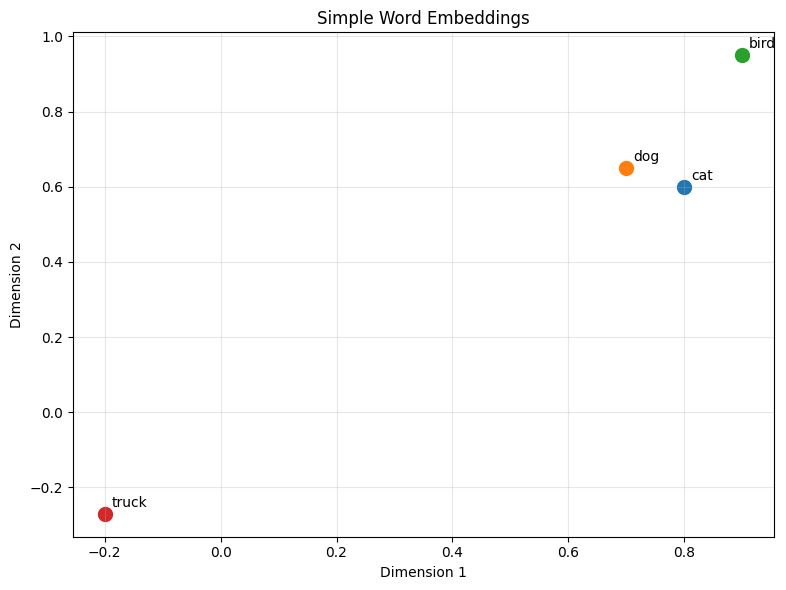

In [5]:
fix, ax = plt.subplots(figsize=(8,6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]),xytext=(5,5), textcoords='offset points')
    
ax.set_title("Simple Word Embeddings")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Measuring similarity

In [10]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similiarity measures the angle between two vectors
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: opposite meanings
    """
    
    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    
    return dot_product / (norm_a * norm_b)

In [13]:
# Example
cat=[0.8, 0.6]
dog=[0.7, 0.65]
bird=[0.9,0.95]

cat_dog_similarity = cosine_similarity(cat, dog)
print(f"Similar: {cat_dog_similarity}")

Similar: 0.9945054529214059


### Create first embedding

In [5]:
### Openai and Huggingdace Embeddings
from langchain_huggingface import HuggingFaceEmbeddings

model = "sentence-transformers/all-MiniLM-L6-v2"

## Initialize a simple embedding model(local without api key)
embeddings = HuggingFaceEmbeddings(
    model=model,
    model_kwargs={"device": "cuda"}
)

embeddings

HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={'device': 'cuda'}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [7]:
## create your first embeddings
text="Hello, I am learning about embedding"

embed = embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length: {len(embed)}")
print(embed)

Text: Hello, I am learning about embedding
Embedding length: 384
[-0.012541049160063267, -0.0842897966504097, -0.0037359369453042746, -0.003694472135975957, 0.02905442751944065, 0.06126973778009415, 0.01203105878084898, 0.017726879566907883, 0.04343545809388161, -0.028131846338510513, 0.020118605345487595, 0.07650146633386612, 0.04530565068125725, 0.0022559608332812786, -0.057901687920093536, 0.014729890041053295, 0.052186477929353714, 0.056562915444374084, -0.09237099438905716, -0.027782181277871132, -0.02874271757900715, -0.0549190528690815, 0.01118690986186266, -0.10679486393928528, 0.013341379351913929, -0.018864087760448456, -0.0051791067235171795, 0.07339488714933395, 0.10817254334688187, -0.07271403819322586, 0.05805012956261635, -0.03648952394723892, -0.001090693287551403, 0.05775722488760948, -0.07553371787071228, 0.1114145889878273, 0.025488972663879395, -0.01331322081387043, -0.07460540533065796, -0.010939504019916058, 0.019129641354084015, 0.014313763938844204, -0.023572396

In [10]:
sentences = [
    "The sun sets in the west.",
    "Birds chirp in the morning.",
    "The moon rises in the east.",
    "Flowers bloom in spring.",
    "Autumn leaves change color.",
    "Winter snow blankets the ground."
]

embed = embeddings.embed_documents(sentences)
print(f"Text: {sentences}")
print(f"Embedding length: {len(embed)}")
print(embed)

Text: ['The sun sets in the west.', 'Birds chirp in the morning.', 'The moon rises in the east.', 'Flowers bloom in spring.', 'Autumn leaves change color.', 'Winter snow blankets the ground.']
Embedding length: 6
[[0.06280852854251862, 0.09388463199138641, 0.03885263577103615, 0.07674022018909454, 0.019083574414253235, -0.04521263390779495, 0.008525071665644646, -0.07709907740354538, 0.04752307012677193, 0.014126998372375965, 0.024190891534090042, -0.03818429633975029, -0.006801262963563204, 0.01270085759460926, 0.07104195654392242, 0.005791792180389166, -0.0030716450419276953, -0.09208331257104874, 0.009273737668991089, -0.03988388925790787, -0.09662483632564545, -0.07869183272123337, 0.021259095519781113, 0.05930653586983681, -0.004664216190576553, 0.029937123879790306, -0.02222631499171257, 0.02919861301779747, -0.016299713402986526, 0.0017978845862671733, -0.04747706651687622, 0.013424577191472054, -0.037299495190382004, 0.04841126874089241, -0.04218662157654762, 0.0120390998199582